In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import pandas as pd
from sklearn import linear_model


In [3]:
base = '/home/knight/matar/MATLAB/DATA/Avgusta/PCA/'


## regression on ROI

In [ ]:
filename = os.path.join(base, 'csvs_FINAL', 'ROI_cross.csv')
ROI_cross = pd.read_csv(filename)

## regressions on bin parameters

In [175]:
filename = os.path.join(base, 'csvs_FINAL', 'regression_data.csv')
regression_data = pd.read_csv(filename)

filename = os.path.join(base, 'csvs_FINAL', 'Dur_offsets.csv')
dur_offsets = pd.read_csv(filename)

filename = os.path.join(base, 'csvs_FINAL', 'Bin_Stats_v1_D+R.csv')
bin_stats = pd.read_csv(filename)

filename = os.path.join(base, 'csvs_FINAL', 'resp_onsets.csv')
resp_onsets = pd.read_csv(filename)

filename = os.path.join(base, 'csvs_FINAL', 'ROI_cross.csv')
ROI_cross = pd.read_csv(filename)

In [192]:
def model_output(X, y, to_plot = True):
    
    lm = linear_model.LinearRegression()
    lm.fit(X, y)

    # The mean square error
    print("Residual sum of squares: %.2f"
          % np.mean((lm.predict(X) - y) ** 2))

    # Explained variance score: 1 is perfect prediction
    print('R2: %.3f' % lm.score(X, y))
    
    # coefficient
    print('coefficient: {0}'.format(lm.coef_))

    if to_plot:
        # Plot outputs
        f, ax = plt.subplots()
        ax.scatter(X, y,  color='black')
        ax.plot(X, lm.predict(X), color='blue',
                 linewidth=3)
        return lm, ax
    else:
        return lm

response onset
Residual sum of squares: 56643.41
R2: 0.710
coefficient: [[ 0.81214856]]


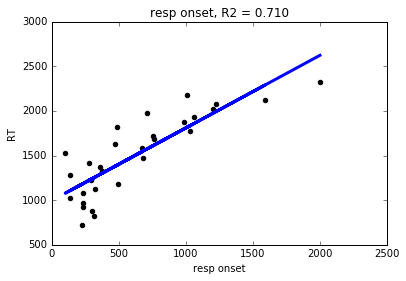

In [202]:
# response onset
print('response onset')
X = resp_onsets['Start'].values.reshape(-1, 1)
y = resp_onsets['RT'].values.reshape(-1,1)

lm, ax = model_output(X,y)
ax.set_title('resp onset, R2 = %.3f' % lm.score(X, y))
ax.set_xlabel('resp onset')
ax.set_ylabel('RT')

duration offset
Residual sum of squares: 14816.76
R2: 0.924
coefficient: [[ 0.90191726]]


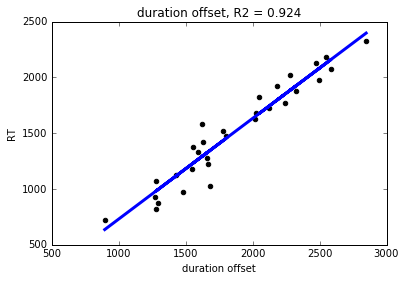

In [193]:
# duration offset
print('duration offset')
X = dur_offsets['end_idx'].values.reshape(-1, 1)
y = dur_offsets['RT'].values.reshape(-1,1)

lm, ax = model_output(X,y)
ax.set_title('duration offset, R2 = %.3f' % lm.score(X, y))
ax.set_xlabel('duration offset')
ax.set_ylabel('RT')

resp peak latency
Residual sum of squares: 2274.56
R2: 0.988
coefficient: [[ 0.97744761]]


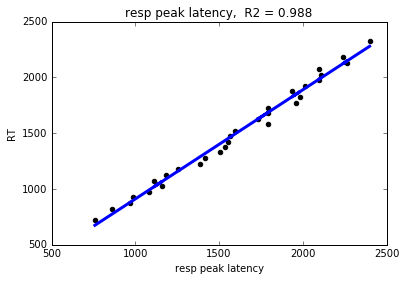

In [195]:
# resp peak latency
print ('resp peak latency')
X = bin_stats[bin_stats.RT.isin(dur_offsets.RT.values)]['resp peak lat'].values.reshape(-1, 1)
y = bin_stats[bin_stats.RT.isin(dur_offsets.RT.values)]['RT'].values.reshape(-1, 1)

lm, ax = model_output(X,y)
ax.set_title('resp peak latency,  R2 = %.3f' % lm.score(X, y))
ax.set_xlabel('resp peak latency')
ax.set_ylabel('RT')

cross over point
Residual sum of squares: 1287.64
R2: 0.993
coefficient: [[ 1.0453391]]


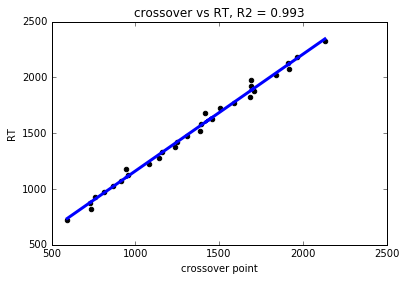

In [197]:
#cross over point
print('cross over point')
X = regression_data['t2 (last cross)'].values.reshape(-1, 1)
y = regression_data['RT SR'].values.reshape(-1,1)

lm, ax = model_output(X,y)
ax.set_title('crossover vs RT, R2 = %.3f' % lm.score(X, y))
ax.set_xlabel('crossover point')
ax.set_ylabel('RT')

In [173]:
# duration offset and resp peak latency
print('duration offset and resp peak latency')
X1 = bin_stats[bin_stats.RT.isin(dur_offsets.RT.values)]['resp peak lat'].values
X2 = dur_offsets['end_idx'].values
X = pd.DataFrame([X1, X2]).transpose()
y = dur_offsets['RT'].values.reshape(-1,1)

model_output(X,y, to_plot = False)


duration offset and resp peak latency
Residual sum of squares: 1702.72
R2: 0.991
coefficient: [[ 0.81564942  0.16253166]]


In [168]:
# duration offset and resp onset
print('duration offest and resp onset')
X1 = dur_offsets['end_idx'].values
X2 = resp_onsets['Start'].values
X = pd.DataFrame([X1, X2]).transpose()
y = dur_offsets['RT'].values.reshape(-1,1)

model_output(X,y, to_plot = False)


duration offest and resp onset
Residual sum of squares: 14114.38
R2: 0.928
coefficient: [[ 0.81376825  0.10744355]]


ROI cross over point
Residual sum of squares: 21300.85
R2: 0.890
coefficient: [[ 0.74684048]]


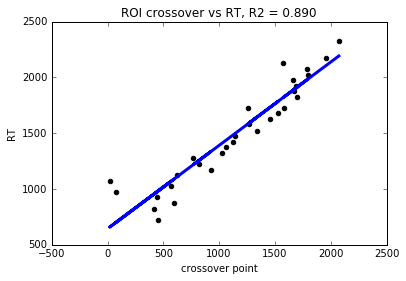

In [198]:
#crossover point for ROIs (PFC vs motor)
print('ROI cross over point')
X = ROI_cross['ROI_Cross_automatic'].values.reshape(-1, 1)
y = ROI_cross['RT'].values.reshape(-1,1)

lm, ax = model_output(X,y)
ax.set_title('ROI crossover vs RT, R2 = %.3f' % lm.score(X, y))
ax.set_xlabel('crossover point')
ax.set_ylabel('RT')

## variability for difference between RT and :
* response peak latency
* duration offset

For bins

In [147]:
x = bin_stats['resp peak lat'] - bin_stats.RT
print 'resp peak latency - RT:\n\tmean: %.3f\n\tstd: %.2f' %(x.mean(), x.std())

x = dur_offsets.end_idx - dur_offsets.RT
print 'dur offset - RT:\n\tmean: %.3f\n\tstd: %.2f' %(x.mean(), x.std())

resp peak latency - RT:
	mean: 87.767
	std: 48.56
dur offset - RT:
	mean: 353.567
	std: 132.42


## dictionary values - 
### variability in best offsets for duration clusters only

In [127]:
tmpall = pd.DataFrame()
df = pd.read_csv( '/home/knight/matar/MATLAB/DATA/Avgusta/PCA/csvs_FINAL/mean_traces_all_subjs_dropSR.csv')
for j in df[['subj','task']].drop_duplicates().values:
    subj, task = j
    filename = os.path.join(base, 'duration_dict_500_FINAL', '{0}_{1}.csv'.format(subj, task))
    tmp = pd.read_csv(filename)
    tmp['subj'] = subj
    tmp['task'] = task
    dur_clusters = df[(df.subj == subj) & (df.task == task) & (df.pattern == 'D')].cluster.unique()
    tmp['cluster'] = tmp.clusters.apply(lambda x: int(x.split('_')[-1].split('.')[0][1:]))
    tmp = tmp[tmp.cluster.isin(dur_clusters)]
    tmpall = tmpall.append(tmp[['subj','task','best_onset']])

In [137]:
def func(x):
    c = x['best_onset'].count()
    mn = x['best_onset'].mean()
    s = x['best_onset'].std()
    mini = x['best_onset'].min()
    maxi = x['best_onset'].max()
    r = maxi - mini
    return pd.Series([c, mn, s, mini, maxi, r], index=['count','mean', 'std', 'min','max', 'range'])


In [138]:
print 'mean: %.3f' %(tmpall.best_onset.mean())
print 'std: %.3f' %(tmpall.best_onset.std())
print 'min %.3f, max %.3f' %(tmpall.best_onset.min(), tmpall.best_onset.max())

mean: 103.578
std: 207.253
min -325.000, max 500.000


In [139]:
tmp = tmpall.groupby(['subj']).apply(func)
filename = os.path.join(base, 'regression', 'best_offsets_bysubj_duronly.csv' )
tmp.to_csv(filename)

,count,mean,std,min,max,range
subj,,,,,,
CP7,1.0,125.000000,NaN,125.0,125.0,0.0
GP15,11.0,137.909091,187.476641,-125.0,349.0,474.0
GP28,1.0,-75.000000,NaN,-75.0,-75.0,0.0
GP35,5.0,149.200000,120.883001,0.0,324.0,324.0
JH10,1.0,475.000000,NaN,475.0,475.0,0.0
JH17,4.0,43.750000,315.155385,-200.0,500.0,700.0
JH2,9.0,44.444444,191.938213,-325.0,250.0,575.0
JH5,1.0,-125.000000,NaN,-125.0,-125.0,0.0
JH6,4.0,112.500000,261.804635,-175.0,450.0,625.0


In [140]:
tmp = tmpall.groupby(['subj', 'task']).apply(func)
filename = os.path.join(base, 'regression', 'best_offsets_bydataset_duronly.csv' )
tmp.to_csv(filename)

count        mean         std    min    max  range
subj task                                                           
CP7  DecisionAud    1.0  125.000000         NaN  125.0  125.0    0.0
GP15 EmoGen         3.0  332.333333   14.433757  324.0  349.0   25.0
     EmoRep         1.0   49.000000         NaN   49.0   49.0    0.0
     FaceEmo        2.0  -13.000000  158.391919 -125.0   99.0  224.0
     FaceGen        2.0   -0.500000  176.069589 -125.0  124.0  249.0
     SelfAud        1.0  274.000000         NaN  274.0  274.0    0.0
     SelfVis        2.0  112.000000  264.457936  -75.0  299.0  374.0
GP28 SelfAud        1.0  -75.000000         NaN  -75.0  -75.0    0.0
GP35 EmoGen         2.0   99.500000  140.714249    0.0  199.0  199.0
     EmoRep         1.0  324.000000         NaN  324.0  324.0    0.0
     FaceEmo        1.0   99.000000         NaN   99.0   99.0    0.0
     FaceGen        1.0  124.000000         NaN  124.0  124.0    0.0
JH10 SelfAud        1.0  475.000000         NaN  475.0  475.0    0.0
JH17 SelfAud        2.0  187.500000  441.941738 -125.0  500.0  625.0
     SelfVis        2.0 -100.000000  141.421356 -200.0    0.0  200.0
JH2  EmoGen         3.0  225.000000   25.000000  200.0  250.0   50.0
     FaceEmo        3.0    8.333333   87.797115  -75.0  100.0  175.0
     SelfAud        1.0 -325.000000         NaN -325.0 -325.0    0.0
     SelfVis        2.0   12.500000  194.454365 -125.0  150.0  275.0
JH5  EmoRep         1.0 -125.000000         NaN -125.0 -125.0    0.0
JH6  FaceEmo        2.0   87.500000   88.388348   25.0  150.0  125.0
     SelfAud        2.0  137.500000  441.941738 -175.0  450.0  625.0
ST1  EmoGen         1.0 -125.000000         NaN -125.0 -125.0    0.0
     SelfAud        1.0  449.000000         NaN  449.0  449.0    0.0
ST15 SelfAud        1.0 -250.000000         NaN -250.0 -250.0    0.0
ST27 DecisionVis    1.0  100.000000         NaN  100.0  100.0    0.0
ST32 DecisionVis    3.0  175.000000  156.124950   50.0  350.0  300.0
ST4  EmoRep         1.0  274.000000         NaN  274.0  274.0    0.0

## Variability in offsets for duration electrodes

In [75]:
def func(x):
    c = x['end_idx_resp'].count()
    mn = x['end_idx_resp'].mean()
    s = x['end_idx_resp'].std()
    r = x['end_idx_resp'].max() - x['end_idx_resp'].min()
    return pd.Series([c, mn, s, r], index=['count','mean', 'std', 'range'])

In [77]:
filename = os.path.join(base, 'regression', 'end_idx_bydataset_duronly.csv' )
tmp = df[df.pattern == 'D'].groupby(['subj','task']).apply(func)
tmp.to_csv(filename)

In [78]:
filename = os.path.join(base, 'regression', 'end_idx_bysubj_duronly.csv' )
tmp = df[df.pattern == 'D'].groupby(['subj']).apply(func)
tmp.to_csv(filename)